In [1]:
import pandas as pd

# Load the dataset
file_path = 'airbnb_Chicago.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Get the number of rows before dropping missing values
rows_before = data.shape[0]

# Drop rows with missing values
data_cleaned = data.dropna()

# Get the number of rows after dropping missing values
rows_after = data_cleaned.shape[0]

# Print the results
print(f"Number of rows before dropping missing values: {rows_before}")
print(f"Number of rows after dropping missing values: {rows_after}")


Number of rows before dropping missing values: 120217
Number of rows after dropping missing values: 0


In [11]:
import pandas as pd

# Load the dataset
file_path = 'airbnb_Chicago.csv'
df = pd.read_csv(file_path)

# List of columns to keep and handle missing values
columns_to_check_missing = [
    'prev_time_to_date_mean', 'prev_booked_days_avePrice', 'prev_booked_days',
    'prev_occupancy_rate', 'prev_revenue', 'time_to_date_mean',
    'booked_days_avePrice', 'booked_days', 'occupancy_rate', 'revenue'
]

# Drop rows with missing values in the specified columns
initial_shape = df.shape
df = df.dropna(subset=columns_to_check_missing)

# Drop the column "Integrated Property Manager"
df = df.drop(columns=['Integrated Property Manager'], errors='ignore')

# Final shape of the dataset
final_shape = df.shape

print(f"Initial shape of the dataset: {initial_shape}")
print(f"Final shape of the dataset: {final_shape}")


Initial shape of the dataset: (120217, 111)
Final shape of the dataset: (63286, 110)


In [4]:
import pandas as pd

# Load the dataset
file_path = 'airbnb_Chicago.csv'  # Update this with the correct path to your file
df = pd.read_csv(file_path)

# Calculate the percentage of missing values for each feature
missing_percentage = df.isnull().mean() * 100

# Create a DataFrame to display the results in a clean format
missing_summary = pd.DataFrame({
    'Feature': df.columns,
    'Missing_Percentage': missing_percentage
}).sort_values(by='Missing_Percentage', ascending=False)

# Print the results
print("Percentage of Missing Data Per Feature:")
print(missing_summary)

# Optionally, save the results to a CSV file
missing_summary.to_csv("missing_data_summary.csv", index=False)


Percentage of Missing Data Per Feature:
                                                 Feature  Missing_Percentage
Integrated Property Manager  Integrated Property Manager          100.000000
prev_time_to_date_mean            prev_time_to_date_mean           37.125365
prev_booked_days_avePrice      prev_booked_days_avePrice           33.517722
prev_booked_days                        prev_booked_days           33.517722
prev_occupancy_rate                  prev_occupancy_rate           33.517722
...                                                  ...                 ...
tract_white_perc                        tract_white_perc            0.000000
tract_black_perc                        tract_black_perc            0.000000
tract_asian_perc                        tract_asian_perc            0.000000
tract_housing_units                  tract_housing_units            0.000000
Airbnb Host ID                            Airbnb Host ID            0.000000

[111 rows x 2 columns]


In [9]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "airbnb_Chicago.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Print the shape of the dataset
print("Shape of the dataset:", data.shape)

# Calculate and print the total number of missing values
total_missing_values = data.isnull().sum().sum()
print("Total number of missing values in the dataset:", total_missing_values)

# Print the number of missing values before handling
print("Missing values before handling:")
print(data.isnull().sum())

# Drop the "Integrated Property Manager" column
if "Integrated Property Manager" in data.columns:
    data.drop(columns=["Integrated Property Manager"], inplace=True)

# Handling missing values
# 1. Numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if "num" in col or "rate" in col or "percent" in col or "Ratio" in col or "Proportion" in col:
        # Fill with 0 if it's a count or percentage column
        data[col].fillna(0, inplace=True)
    elif "ave" in col or "mean" in col:
        # Use the mean for average-related columns
        data[col].fillna(data[col].mean(), inplace=True)
    elif "price" in col or "revenue" in col:
        # Use the median for monetary values to handle skewed distributions
        data[col].fillna(data[col].median(), inplace=True)

# 2. Categorical columns
categorical_cols = data.select_dtypes(include=[object]).columns
for col in categorical_cols:
    if "Type" in col or "City" in col or "Neighborhood" in col or "Zipcode" in col:
        # Fill with the mode for categorical data
        data[col].fillna(data[col].mode()[0], inplace=True)
    elif "date" in col or "Date" in col:
        # Drop rows if a date-related column is missing, as dates are often critical
        data.dropna(subset=[col], inplace=True)
    elif "host_is_superhost" in col or "superhost" in col:
        # Assume "not a superhost" for missing values
        data[col].fillna(0, inplace=True)
    else:
        # Fill with 'Unknown' for other categorical columns
        data[col].fillna('Unknown', inplace=True)

# 3. Logical (binary) columns
binary_cols = [col for col in data.columns if data[col].nunique() == 2]
for col in binary_cols:
    # Fill binary columns with the mode
    data[col].fillna(data[col].mode()[0], inplace=True)
    
# Print the shape of the dataset
print("Shape of the dataset:", data.shape)

# Calculate and print the total number of missing values
total_missing_values = data.isnull().sum().sum()
print("Total number of missing values in the dataset:", total_missing_values)

# Print the number of missing values after handling
print("\nMissing values after handling:")
print(data.isnull().sum())

missing_after_1 = data.isnull().sum()





Shape of the dataset: (120217, 111)
Total number of missing values in the dataset: 1047316
Missing values before handling:
Airbnb Host ID                0
Airbnb Property ID            0
City_x                        0
superhost_period_all          0
scrapes_in_period             0
                          ...  
revenue_period_tract          0
tract_booking_share           0
tract_revenue_share           0
time_to_date_mean         38108
prev_time_to_date_mean    44631
Length: 111, dtype: int64
Shape of the dataset: (120217, 110)
Total number of missing values in the dataset: 314796

Missing values after handling:
Airbnb Host ID            0
Airbnb Property ID        0
City_x                    0
superhost_period_all      0
scrapes_in_period         0
                         ..
revenue_period_tract      0
tract_booking_share       0
tract_revenue_share       0
time_to_date_mean         0
prev_time_to_date_mean    0
Length: 110, dtype: int64


In [10]:
# Loop through the dataset to identify columns with missing values
missing_values = data.isnull().sum()

# Filter columns with missing values and print them
print("Features with missing values and their total count:")
for col, count in missing_values[missing_values > 0].items():
    print(f"{col}: {count}")


Features with missing values and their total count:
prop_5_StarReviews_pastYear: 19845
prev_prop_5_StarReviews_pastYear: 29172
hostResponseNumber_pastYear: 7366
hostResponseAverage_pastYear: 7366
prev_hostResponseNumber_pastYear: 18100
prev_hostResponseAverage_pastYear: 18100
available_days: 15027
booked_days: 38108
prev_available_days: 11262
prev_booked_days: 40294
Bedrooms: 11
Bathrooms: 47
Max Guests: 8
Cleaning Fee (USD): 24158
Minimum Stay: 3
Number of Photos: 6
prev_Nightly Rate: 9846
Number of Reviews: 18
prev_Number of Reviews: 9715
Rating Overall: 14776
prev_Rating Overall: 25760
Nightly Rate_tractQuartile: 5334
prev_Nightly Rate_tractQuartile: 15140
tractQuartilePrice_variance: 5334


In [12]:
# Drop rows where certain critical columns have missing values
critical_columns = ['Bedrooms', 'Bathrooms', 'Max Guests', 'Minimum Stay', 'Number of Photos', 'Number of Reviews']
data.dropna(subset=critical_columns, inplace=True)

# Handle remaining missing values
for col in data.columns:
    if data[col].isnull().sum() > 0:
        # Numeric columns
        if data[col].dtype in ['float64', 'int64']:
            if 'price' in col or 'revenue' in col or 'Rate' in col or 'variance' in col:
                # For price, revenue, and variance-related columns, use median
                data[col].fillna(data[col].median(), inplace=True)
            elif 'ratio' in col or 'proportion' in col or 'percentage' in col:
                # For ratio or percentage columns, fill with 0
                data[col].fillna(0, inplace=True)
            else:
                # For other numeric columns, use mean
                data[col].fillna(data[col].mean(), inplace=True)
        # Categorical columns
        elif data[col].dtype == 'object':
            if 'Type' in col or 'City' in col or 'Neighborhood' in col or 'Zipcode' in col:
                # Fill categorical fields with the mode
                data[col].fillna(data[col].mode()[0], inplace=True)
            else:
                # For other categorical columns, use 'Unknown'
                data[col].fillna('Unknown', inplace=True)
        # Binary columns
        elif data[col].nunique() == 2:
            # Fill binary columns with the mode
            data[col].fillna(data[col].mode()[0], inplace=True)

# Verify there are no missing values left
assert data.isnull().sum().sum() == 0, "There are still missing values in the dataset."

# Save the cleaned dataset to a new CSV file
cleaned_file_path = "airbnb_Chicago_cleaned.csv"
data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}.")


Cleaned dataset saved to airbnb_Chicago_cleaned.csv.


In [15]:
total_missing_values = data.isnull().sum().sum()
print("Total number of missing values in the dataset:", total_missing_values)
print(data.shape)

Total number of missing values in the dataset: 0
(120124, 110)


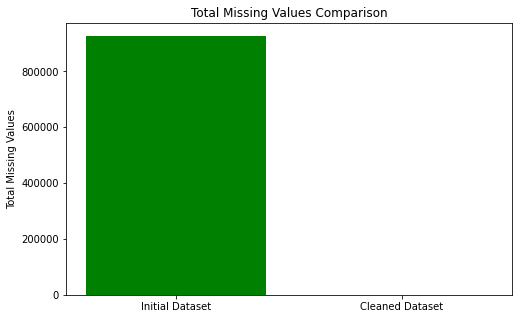

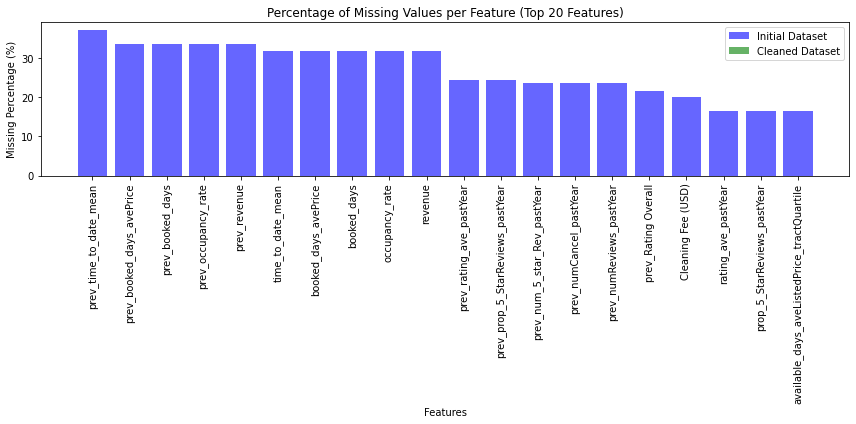

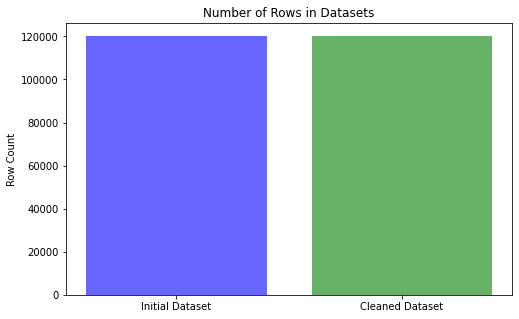

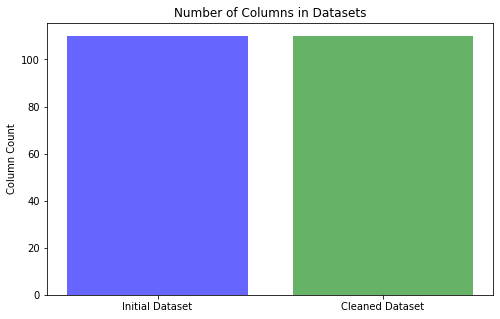

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the initial and cleaned datasets
initial_dataset_path = "airbnb_Chicago.csv"
cleaned_dataset_path = "airbnb_Chicago_cleaned.csv"

initial_data = pd.read_csv(initial_dataset_path)
cleaned_data = pd.read_csv(cleaned_dataset_path)

# Drop 'Integrated Property Manager' column from the initial dataset for a fair comparison
if "Integrated Property Manager" in initial_data.columns:
    initial_data = initial_data.drop(columns=["Integrated Property Manager"])

# Calculate total missing values in both datasets
initial_missing = initial_data.isnull().sum().sum()
cleaned_missing = cleaned_data.isnull().sum().sum()

# Calculate percentage of missing values per feature in both datasets
initial_missing_perc = (initial_data.isnull().sum() / len(initial_data)) * 100
cleaned_missing_perc = (cleaned_data.isnull().sum() / len(cleaned_data)) * 100

# Sort features by initial missing percentage for consistent comparison
sorted_features = initial_missing_perc.sort_values(ascending=False).index

# Plot total missing values before and after cleaning
plt.figure(figsize=(8, 5))
plt.bar(["Initial Dataset", "Cleaned Dataset"], [initial_missing, cleaned_missing], color=['green', 'green'])
plt.title("Total Missing Values Comparison")
plt.ylabel("Total Missing Values")
plt.show()

# Plot percentage of missing values per feature for top 20 features
top_features = sorted_features[:20]

plt.figure(figsize=(12, 6))
plt.bar(top_features, initial_missing_perc[top_features], label="Initial Dataset", alpha=0.6, color='blue')
plt.bar(top_features, cleaned_missing_perc[top_features], label="Cleaned Dataset", alpha=0.6, color='green')
plt.xticks(rotation=90)
plt.title("Percentage of Missing Values per Feature (Top 20 Features)")
plt.ylabel("Missing Percentage (%)")
plt.xlabel("Features")
plt.legend()
plt.tight_layout()
plt.show()

# Plot dataset shape comparison
initial_shape = initial_data.shape
cleaned_shape = cleaned_data.shape

plt.figure(figsize=(8, 5))
plt.bar(["Initial Dataset", "Cleaned Dataset"], [initial_shape[0], cleaned_shape[0]], color=['blue', 'green'], alpha=0.6)
plt.title("Number of Rows in Datasets")
plt.ylabel("Row Count")
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(["Initial Dataset", "Cleaned Dataset"], [initial_shape[1], cleaned_shape[1]], color=['blue', 'green'], alpha=0.6)
plt.title("Number of Columns in Datasets")
plt.ylabel("Column Count")
plt.show()


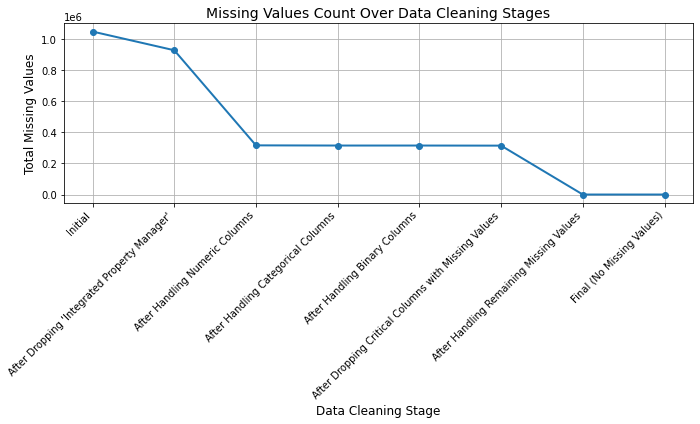

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "airbnb_Chicago.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Initialize a dictionary to track missing values count
missing_values_tracker = {"Stage": [], "MissingValues": []}

# Function to record missing values
def record_missing_values(stage, dataset):
    total_missing = dataset.isnull().sum().sum()
    missing_values_tracker["Stage"].append(stage)
    missing_values_tracker["MissingValues"].append(total_missing)

# Record initial missing values
record_missing_values("Initial", data)

# Drop the "Integrated Property Manager" column if it exists
if "Integrated Property Manager" in data.columns:
    data.drop(columns=["Integrated Property Manager"], inplace=True)
record_missing_values("After Dropping 'Integrated Property Manager'", data)

# Handling missing values
# 1. Numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if "num" in col or "rate" in col or "percent" in col or "Ratio" in col or "Proportion" in col:
        data[col].fillna(0, inplace=True)
    elif "ave" in col or "mean" in col:
        data[col].fillna(data[col].mean(), inplace=True)
    elif "price" in col or "revenue" in col:
        data[col].fillna(data[col].median(), inplace=True)
record_missing_values("After Handling Numeric Columns", data)

# 2. Categorical columns
categorical_cols = data.select_dtypes(include=[object]).columns
for col in categorical_cols:
    if "Type" in col or "City" in col or "Neighborhood" in col or "Zipcode" in col:
        data[col].fillna(data[col].mode()[0], inplace=True)
    elif "date" in col or "Date" in col:
        data.dropna(subset=[col], inplace=True)
    elif "host_is_superhost" in col or "superhost" in col:
        data[col].fillna(0, inplace=True)
    else:
        data[col].fillna('Unknown', inplace=True)
record_missing_values("After Handling Categorical Columns", data)

# 3. Logical (binary) columns
binary_cols = [col for col in data.columns if data[col].nunique() == 2]
for col in binary_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)
record_missing_values("After Handling Binary Columns", data)

# Drop rows where certain critical columns have missing values
critical_columns = ['Bedrooms', 'Bathrooms', 'Max Guests', 'Minimum Stay', 'Number of Photos', 'Number of Reviews']
data.dropna(subset=critical_columns, inplace=True)
record_missing_values("After Dropping Critical Columns with Missing Values", data)

# Handle remaining missing values
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype in ['float64', 'int64']:
            if 'price' in col or 'revenue' in col or 'Rate' in col or 'variance' in col:
                data[col].fillna(data[col].median(), inplace=True)
            elif 'ratio' in col or 'proportion' in col or 'percentage' in col:
                data[col].fillna(0, inplace=True)
            else:
                data[col].fillna(data[col].mean(), inplace=True)
        elif data[col].dtype == 'object':
            if 'Type' in col or 'City' in col or 'Neighborhood' in col or 'Zipcode' in col:
                data[col].fillna(data[col].mode()[0], inplace=True)
            else:
                data[col].fillna('Unknown', inplace=True)
        elif data[col].nunique() == 2:
            data[col].fillna(data[col].mode()[0], inplace=True)
record_missing_values("After Handling Remaining Missing Values", data)

# Verify no missing values are left
assert data.isnull().sum().sum() == 0, "There are still missing values in the dataset."
record_missing_values("Final (No Missing Values)", data)

# Save the cleaned dataset (commented out as per instructions)
# cleaned_file_path = "airbnb_Chicago_cleaned.csv"
# data.to_csv(cleaned_file_path, index=False)
# print(f"Cleaned dataset saved to {cleaned_file_path}.")

# Plot the missing values over time
plt.figure(figsize=(10, 6))
plt.plot(missing_values_tracker["Stage"], missing_values_tracker["MissingValues"], marker='o', linestyle='-', linewidth=2)
plt.title("Missing Values Count Over Data Cleaning Stages", fontsize=14)
plt.xlabel("Data Cleaning Stage", fontsize=12)
plt.ylabel("Total Missing Values", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(visible=True)
plt.tight_layout()
plt.show()
